<a href="https://colab.research.google.com/github/rbpernas/Learning_Projects/blob/main/House_prices_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Main goal
In this notebook I'll analyze the most significative features of the Kaggle dataset to visualize the relationship between this features and the prices.
The features we are going to analize, as our first Random Forest prediction suggest (NUM AS ROOT priority) are:


*   OverallQual
*   ExterQual
*   Neigborhood
*   GarageCars
*   YearBuilt
*   BsmtQual
*   TotalBsmtSF
*   GrLivArea

Notice that, since we are restricting our analysis to these variables, we are unlikely to achieve the same accuracy as on the first attempt.

# Import libraries and dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
df_train = pd.read_csv('/content/train.csv')
display(df_train.head())

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


## Delete values

In [4]:
columns_to_keep = [
    'SalePrice',
    'OverallQual',
    'ExterQual',
    'Neighborhood',
    'GarageCars',
    'YearBuilt',
    'BsmtQual',
    'TotalBsmtSF',
    'GrLivArea'
]

df_train = df_train[columns_to_keep]
display(df_train.head())

,SalePrice,OverallQual,ExterQual,Neighborhood,GarageCars,YearBuilt,BsmtQual,TotalBsmtSF,GrLivArea
0,208500,7,Gd,CollgCr,2,2003,Gd,856,1710
1,181500,6,TA,Veenker,2,1976,Gd,1262,1262
2,223500,7,Gd,CollgCr,2,2001,Gd,920,1786
3,140000,7,TA,Crawfor,3,1915,TA,756,1717
4,250000,8,Gd,NoRidge,3,2000,Gd,1145,2198


In [5]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   SalePrice     1460 non-null   int64 
 1   OverallQual   1460 non-null   int64 
 2   ExterQual     1460 non-null   object
 3   Neighborhood  1460 non-null   object
 4   GarageCars    1460 non-null   int64 
 5   YearBuilt     1460 non-null   int64 
 6   BsmtQual      1423 non-null   object
 7   TotalBsmtSF   1460 non-null   int64 
 8   GrLivArea     1460 non-null   int64 
dtypes: int64(6), object(3)
memory usage: 102.8+ KB


# Analysis of the data

Split the dataset

In [6]:
list(set(df_train.dtypes.tolist()))


[dtype('int64'), dtype('O')]

In [9]:
df_num = df_train.select_dtypes(include = ['int64'])
df_num.head()

,SalePrice,OverallQual,GarageCars,YearBuilt,TotalBsmtSF,GrLivArea
0,208500,7,2,2003,856,1710
1,181500,6,2,1976,1262,1262
2,223500,7,2,2001,920,1786
3,140000,7,3,1915,756,1717
4,250000,8,3,2000,1145,2198


In [11]:
df_obj = df_train.select_dtypes(include = ['object'])
df_obj = pd.concat([df_train['SalePrice'], df_obj], axis=1)
display(df_obj.head())

,SalePrice,ExterQual,Neighborhood,BsmtQual
0,208500,Gd,CollgCr,Gd
1,181500,TA,Veenker,Gd
2,223500,Gd,CollgCr,Gd
3,140000,TA,Crawfor,TA
4,250000,Gd,NoRidge,Gd


## Numerical data

array([[<Axes: title={'center': 'SalePrice'}>,
        <Axes: title={'center': 'OverallQual'}>],
       [<Axes: title={'center': 'GarageCars'}>,
        <Axes: title={'center': 'YearBuilt'}>],
       [<Axes: title={'center': 'TotalBsmtSF'}>,
        <Axes: title={'center': 'GrLivArea'}>]], dtype=object)

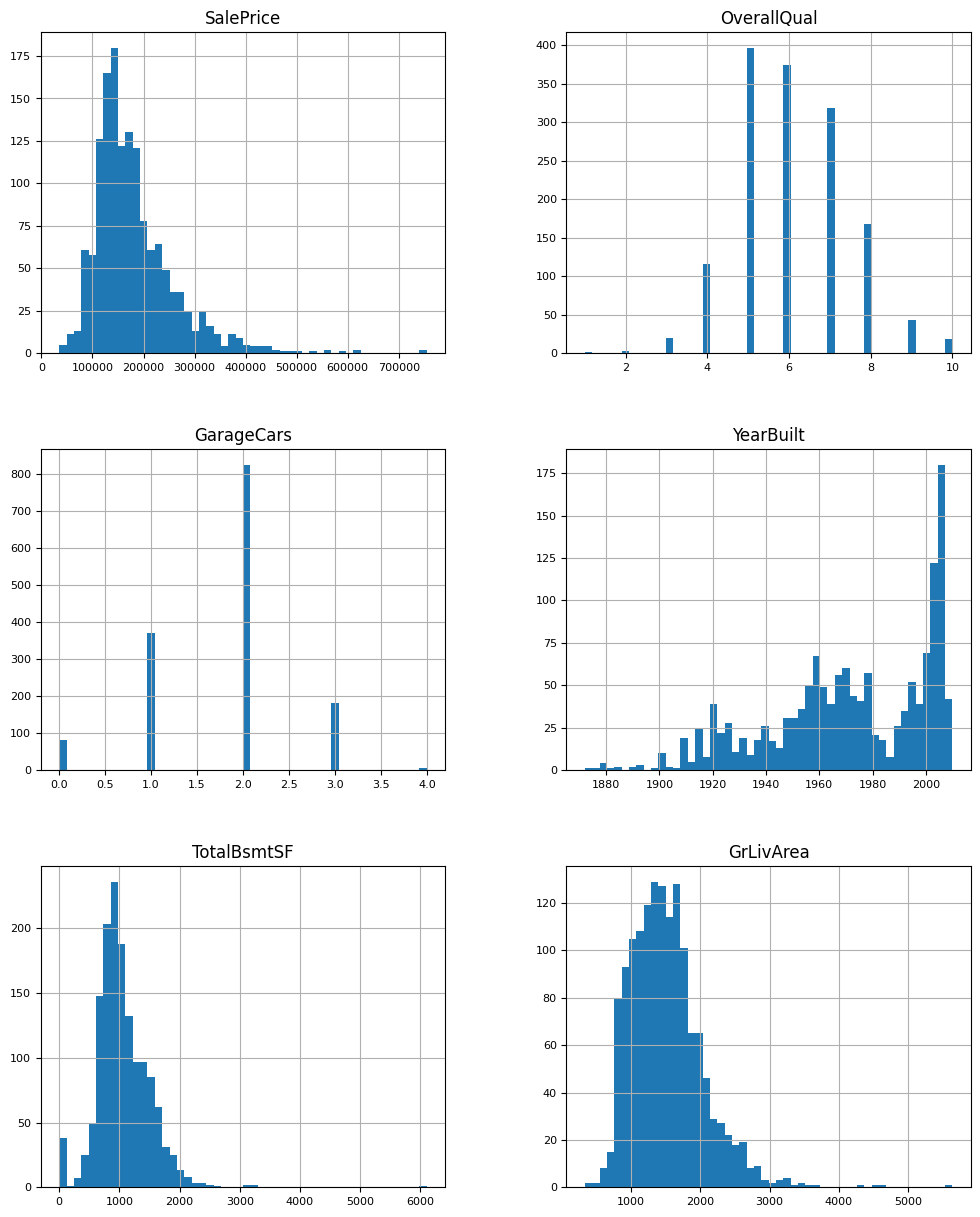

In [16]:
df_num.hist(figsize=(12, 15), bins=50, xlabelsize=8, ylabelsize=8)

### Overall Quality